In [1]:
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd 

from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
from pathlib import Path

import torch

In [2]:
x  = 'Dog_Cat/Dog/'
path = Path(x)
path.ls()

(#10578) [Path('Dog_Cat/Dog/8526.jpg'),Path('Dog_Cat/Dog/8408.jpg'),Path('Dog_Cat/Dog/8943.jpg'),Path('Dog_Cat/Dog/7634.jpg'),Path('Dog_Cat/Dog/4408.jpg'),Path('Dog_Cat/Dog/6390.jpg'),Path('Dog_Cat/Dog/3400.jpg'),Path('Dog_Cat/Dog/5679.jpg'),Path('Dog_Cat/Dog/762.jpg'),Path('Dog_Cat/Dog/93.jpg')...]

In [3]:
files = path.ls()
num_files = len(files)
print(f"In folder {path} there are {num_files} files.")

In folder Dog_Cat/Dog there are 10578 files.


In [4]:
from PIL import Image
import os
data_dir = 'Dog_Cat/Dog/'
invalid_files = []

for filename in os.listdir(data_dir):
    file_path = os.path.join(data_dir, filename)
    try:
        img = Image.open(file_path)
        img.verify()  # Try to open and verify file
    except (IOError, SyntaxError):
        invalid_files.append(filename)

print("Error file:", invalid_files)

Error file: []


In [26]:
#file_remover = "Dog/11702.jpg"
#.ipynb_checkpoints rm -rf `find -type d -name .ipynb_checkpoints`
#os.remove(file_remover)

In [5]:
x = 'Dog_Cat/'
path = Path(x)
num_files = len(get_image_files(path))
print("Numbers of files:", num_files)

Numbers of files: 23077


In [6]:
from fastai.data.all import *
from fastai.vision.all import *
# Create DataBlock
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

# Create object DataLoaders
dls = dblock.dataloaders(path, bs=64)


In [7]:
len(dls.train.items), len(dls.valid.items), len(dls.train), len(dls.valid)

(18462, 4615, 288, 73)

In [8]:
len(dls.valid.items)

4615

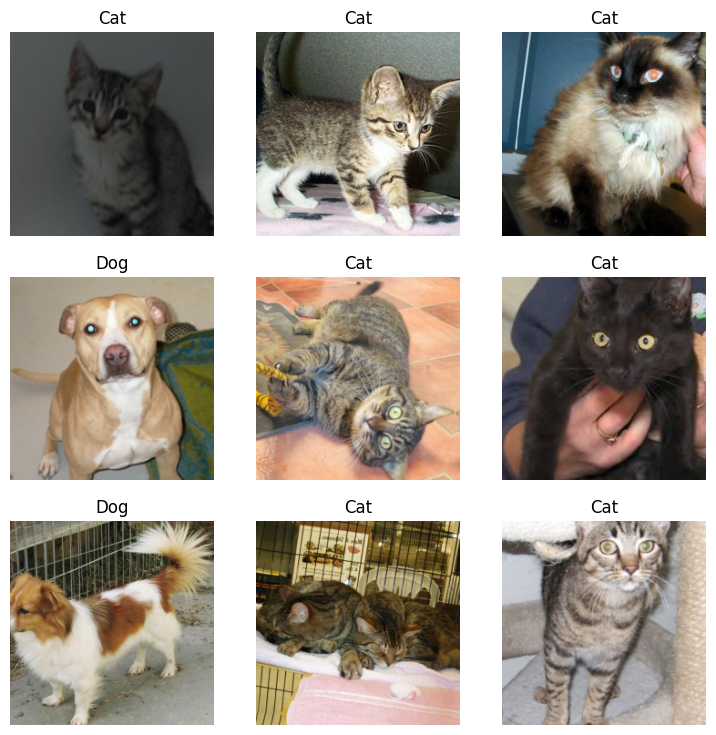

In [9]:
dls.show_batch()

In [10]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [11]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-10-17 18:49:05.075827: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 18:49:05.075878: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 18:49:05.077460: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 18:49:05.190866: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 18:49:06.438192: W tensorflow/compiler/

Num GPUs Available:  1


2023-10-17 18:49:07.328577: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 18:49:07.502674: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 18:49:07.502737: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [12]:
import torch
use_cuda = torch.cuda.is_available()

In [13]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.096945,0.058159,0.982232,01:19


epoch,train_loss,valid_loss,accuracy,time
0,0.063012,0.040965,0.988082,01:40
1,0.039855,0.042407,0.988299,01:28
2,0.028829,0.041689,0.985265,01:28
3,0.013924,0.032023,0.990032,01:28
4,0.006921,0.031499,0.990683,01:28


In [19]:
dls.vocab

['Cat', 'Dog']

In [22]:
# Path to a new Image
image_path = 'kot.jpg'

# Upload new Img
img = PILImage.create(image_path)

# Prediction
pred, _, _ = learn.predict(img)
print(pred)

Cat


In [23]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]